In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


from sklearn.cluster import AgglomerativeClustering


In [89]:
df = pd.read_csv("C:\\Users\\mehul\\MyLab\\NHFS Research\\Data\\NFHS_5_India_Districts_Factsheet_Data.csv")

In [90]:
print(df.shape)
df.head()


(707, 109)


,District Names,State/UT,Number of Households surveyed,Number of Women age 15-49 years interviewed,Number of Men age 15-54 years interviewed,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Children under age 5 years whose birth was registered with the civil authority (%),...,Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%),Men age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ?160 mm of Hg and/or Diastolic ?100 mm of Hg) (%),Men age 15 years and above wih Elevated blood pressure (Systolic ?140 mm of Hg and/or Diastolic ?90 mm of Hg) or taking medicine to control blood pressure (%),Women (age 30-49 years) Ever undergone a screening test for cervical cancer (%),Women (age 30-49 years) Ever undergone a breast examination for breast cancer (%),Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%)
0,Nicobars,Andaman & Nicobar Islands,882,764,125,78.0,23.0,973,927,98.0,...,32.9,11.1,47.0,13.4,13.2,5.4,63.5,76.8,29.6,64.5
1,North & Middle Andaman,Andaman & Nicobar Islands,874,789,108,82.7,19.8,950,844,100.0,...,22.6,6.0,32.2,1.7,0.3,15.8,46.8,70.5,5.1,45.3
2,South Andaman,Andaman & Nicobar Islands,868,844,134,84.7,21.0,967,935,96.5,...,17.9,6.1,26.9,1.3,0.7,8.0,19.6,50.8,1.7,32.8
3,Srikakulam,Andhra Pradesh,874,780,100,60.0,20.7,1140,1163,95.0,...,14.4,5.5,22.9,1.0,0.2,3.8,7.1,21.3,0.6,28.3
4,Vizianagaram,Andhra Pradesh,902,853,134,56.0,20.6,1114,898,95.4,...,14.8,6.4,25.1,4.9,0.6,7.3,11.4,21.5,0.8,32.3


In [91]:
for columns in df.columns:
  print(columns)

District Names
State/UT
Number of Households surveyed
Number of Women age 15-49 years interviewed
Number of Men age 15-54 years interviewed
Female population age 6 years and above who ever attended school (%)
Population below age 15 years (%)
 Sex ratio of the total population (females per 1,000 males)
Sex ratio at birth for children born in the last five years (females per 1,000 males)
Children under age 5 years whose birth was registered with the civil authority (%)
Deaths in the last 3 years registered with the civil authority (%)
Population living in households with electricity (%)
Population living in households with an improved drinking-water source1 (%)
Population living in households that use an improved sanitation facility2 (%)
Households using clean fuel for cooking3 (%)
Households using iodized salt (%)
Households with any usual member covered under a health insurance/financing scheme (%)
Children age 5 years who attended pre-primary school during the school year 2019-20 (%)

# Clustering by Alcohol Consumption

In [92]:
alcohol = df[['Women age 15 years and above who consume alcohol (%)','Men age 15 years and above who consume alcohol (%)']]

In [93]:
alcohol.rename(columns={'Women age 15 years and above who consume alcohol (%)':'Women Alcohol_%','Men age 15 years and above who consume alcohol (%)':'Men  Alcohol_%'})

,Women Alcohol_%,Men Alcohol_%
0,29.6,64.5
1,5.1,45.3
2,1.7,32.8
3,0.6,28.3
4,0.8,32.3
...,...,...
702,0.4,16.5
703,1.5,20.8
704,2.0,14.8
705,0.8,14.6


In [94]:
alcohol['District'] = df['District Names']

C:\Users\mehul\AppData\Local\Temp\ipykernel_984\2525052275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcohol['District'] = df['District Names']


In [95]:
alcohol['District'].nunique()
alcohol['State/UT'] = df['State/UT']

C:\Users\mehul\AppData\Local\Temp\ipykernel_984\9752734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcohol['State/UT'] = df['State/UT']


In [96]:
alcohol

,Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%),District,State/UT
0,29.6,64.5,Nicobars,Andaman & Nicobar Islands
1,5.1,45.3,North & Middle Andaman,Andaman & Nicobar Islands
2,1.7,32.8,South Andaman,Andaman & Nicobar Islands
3,0.6,28.3,Srikakulam,Andhra Pradesh
4,0.8,32.3,Vizianagaram,Andhra Pradesh
...,...,...,...,...
702,0.4,16.5,South Twenty Four Pargana,West Bengal
703,1.5,20.8,Paschim Medinipur,West Bengal
704,2.0,14.8,Purba Medinipur,West Bengal
705,0.8,14.6,Paschim Barddhaman,West Bengal


In [97]:
alcohol = alcohol.rename(columns={'Women age 15 years and above who consume alcohol (%)':'Women Alcohol_%','Men age 15 years and above who consume alcohol (%)':'Men  Alcohol_%'})

### Plot -1


In [98]:
alcohol.columns

Index(['Women Alcohol_%', 'Men  Alcohol_%', 'District', 'State/UT'], dtype='object')

C:\Users\mehul\AppData\Local\Temp\ipykernel_984\3195829675.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(alcohol[x] , bins = 70)
c:\Users\mehul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mehul\AppData\Local\Temp\ipykernel_984\3195829675.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexi

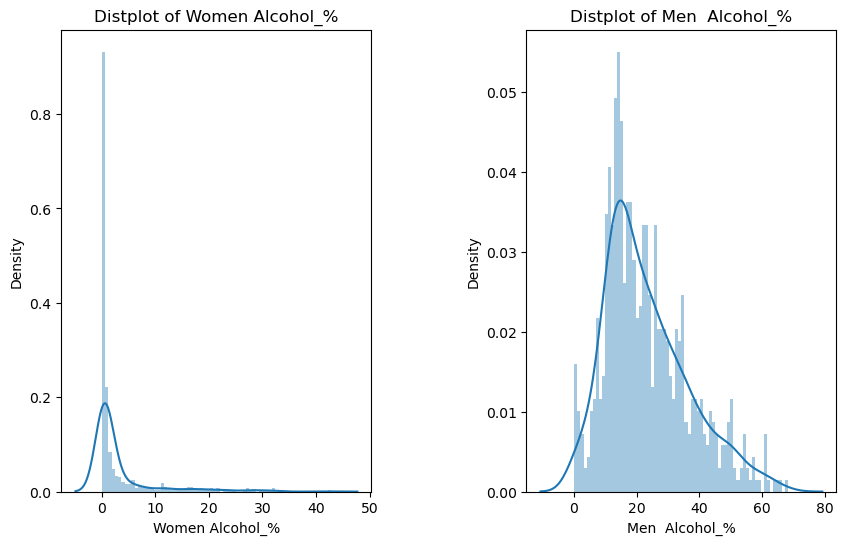

In [99]:
plt.figure(1 , figsize = (10 , 6))
n= 0
for x in ['Women Alcohol_%', 'Men  Alcohol_%']:
  n = n+1
  plt.subplot(1 , 2 , n)
  plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
  sns.distplot(alcohol[x] , bins = 70)
  plt.title('Distplot of {}'.format(x))

plt.show()

In [100]:
X = alcohol[['Women Alcohol_%', 'Men  Alcohol_%']]

In [101]:
X

,Women Alcohol_%,Men Alcohol_%
0,29.6,64.5
1,5.1,45.3
2,1.7,32.8
3,0.6,28.3
4,0.8,32.3
...,...,...
702,0.4,16.5
703,1.5,20.8
704,2.0,14.8
705,0.8,14.6


In [102]:
inertia = []  # WESS
for n in range(1 , 11):  # Number of CLusters to be tried
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

c:\Users\mehul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
c:\Users\mehul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


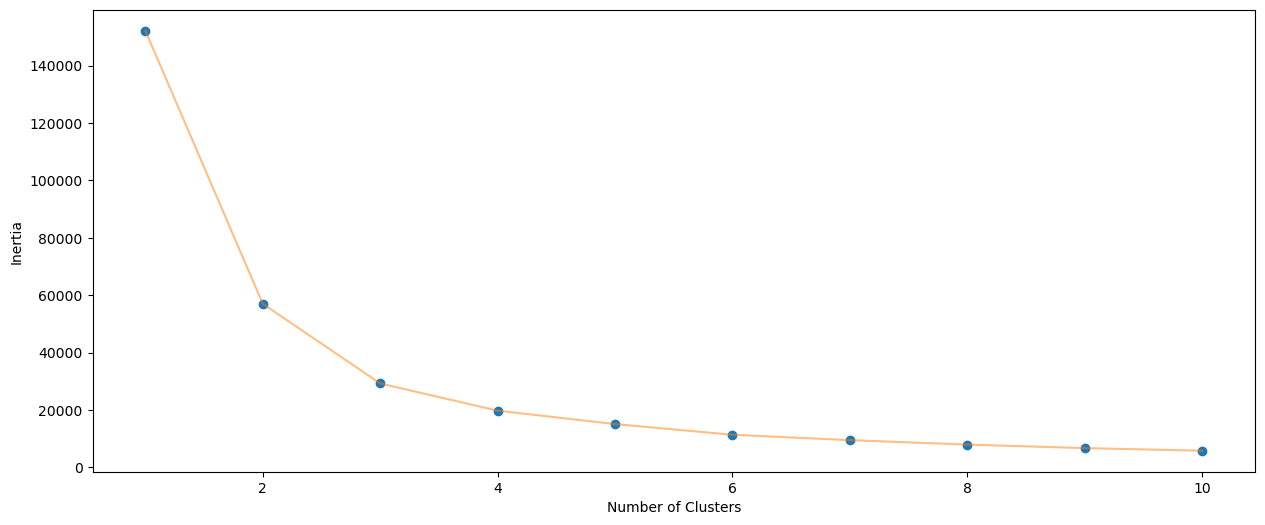

In [103]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [104]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [105]:
lenght = len(labels1)

In [106]:
alcohol['Cluster'] = labels1


In [107]:
alcohol

,Women Alcohol_%,Men Alcohol_%,District,State/UT,Cluster
0,29.6,64.5,Nicobars,Andaman & Nicobar Islands,3
1,5.1,45.3,North & Middle Andaman,Andaman & Nicobar Islands,1
2,1.7,32.8,South Andaman,Andaman & Nicobar Islands,1
3,0.6,28.3,Srikakulam,Andhra Pradesh,0
4,0.8,32.3,Vizianagaram,Andhra Pradesh,1
...,...,...,...,...,...
702,0.4,16.5,South Twenty Four Pargana,West Bengal,2
703,1.5,20.8,Paschim Medinipur,West Bengal,0
704,2.0,14.8,Purba Medinipur,West Bengal,2
705,0.8,14.6,Paschim Barddhaman,West Bengal,2


In [108]:
cluste = alcohol.drop('Women Alcohol_%', axis = 1)


In [109]:
cluste.columns

Index(['Men  Alcohol_%', 'District', 'State/UT', 'Cluster'], dtype='object')

In [110]:
cluster = cluste.drop(['Men  Alcohol_%'], axis = 1 )

In [111]:
cluster['Cluster'] = cluster['Cluster'].astype(int)

In [112]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   District  707 non-null    object
 1   State/UT  707 non-null    object
 2   Cluster   707 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 13.9+ KB


In [113]:
test = cluster[['District','State/UT','Cluster']]

In [114]:
alcohol

,Women Alcohol_%,Men Alcohol_%,District,State/UT,Cluster
0,29.6,64.5,Nicobars,Andaman & Nicobar Islands,3
1,5.1,45.3,North & Middle Andaman,Andaman & Nicobar Islands,1
2,1.7,32.8,South Andaman,Andaman & Nicobar Islands,1
3,0.6,28.3,Srikakulam,Andhra Pradesh,0
4,0.8,32.3,Vizianagaram,Andhra Pradesh,1
...,...,...,...,...,...
702,0.4,16.5,South Twenty Four Pargana,West Bengal,2
703,1.5,20.8,Paschim Medinipur,West Bengal,0
704,2.0,14.8,Purba Medinipur,West Bengal,2
705,0.8,14.6,Paschim Barddhaman,West Bengal,2


Index(['District', 'State/UT', 'Cluster'], dtype='object')
Index(['District', 'STATE', 'REMARKS', 'State_LGD', 'DISTRICT_L', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')


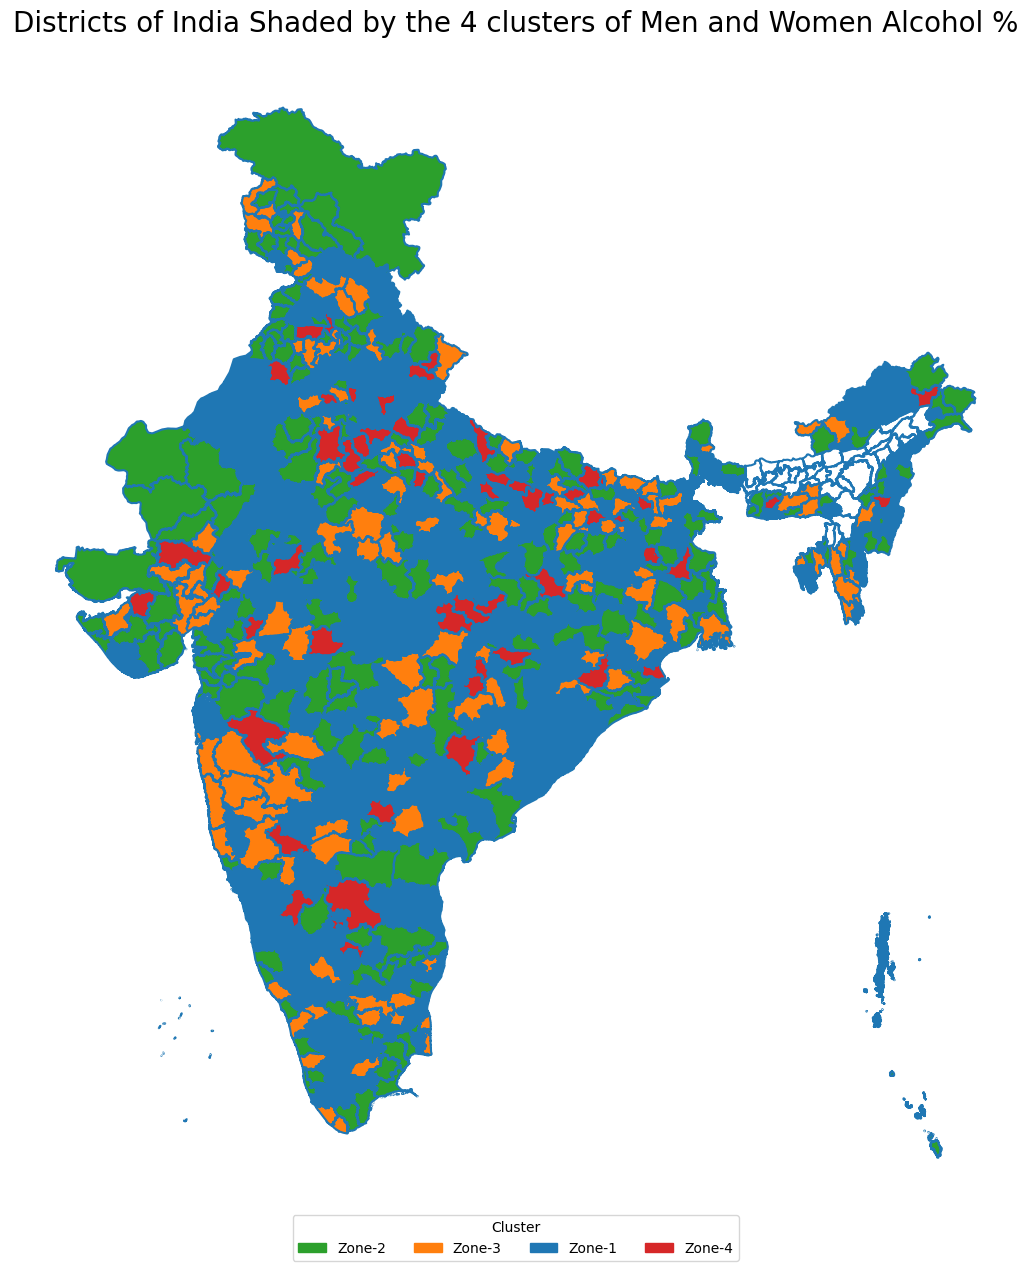

In [115]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches


# Load the India shapefile
shapefile_path = "C:\\Users\\mehul\\MyLab\\NHFS Research\\Data\\shapefile\\DISTRICT_BOUNDARY.shp"
india_shapefile = gpd.read_file(shapefile_path)

# Inspect the column names and data in both DataFrames
print(test.columns)
print(india_shapefile.columns)

# Remove leading/trailing spaces and normalize case
test['District'] = test['District'].str.strip().str.upper()
india_shapefile['DISTRICT_L'] = india_shapefile['DISTRICT_L'].str.strip().str.upper()


# Merge the DataFrame with the shapefile GeoDataFrame
geo_cluster = india_shapefile.merge(test, how='left', left_on='DISTRICT_L', right_on='District')

# Check if the merge was successful

geo_cluster['State/UT'] = test['State/UT']
geo_cluster['District_y'] = test['District']
geo_cluster['Cluster'] = test['Cluster']

# Define a colormap with specific colors for each cluster
colors = ['#2ca02c', '#ff7f0e','#1f77b4', '#d62728']  # Customize your colors here
cmap = mcolors.ListedColormap(colors)
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

norm = mcolors.BoundaryNorm(boundaries=[0, 1, 2, 3, 4], ncolors=4)

# Plot the districts
geo_cluster.boundary.plot(ax=ax)
"""
# Plot the clusters
geo_cluster.plot(column='Cluster', ax=ax, legend=True,
                 legend_kwds={'label': "Cluster",
                              'orientation': "vertical"},
                 cmap=cmap)  # You can choose other colormaps as well
"""
geo_cluster.plot(column='Cluster', ax=ax,
                 legend= False,
                 cmap=cmap, norm = norm)
# Create custom legend
cluster_labels = ['Zone-2', 'Zone-3', 'Zone-1', 'Zone-4']
patches = [mpatches.Patch(color=colors[i], label=cluster_labels[i]) for i in range(len(cluster_labels))]

# Add the legend to the plot
ax.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4, title="Cluster")

# Set the title
ax.set_title('Districts of India Shaded by the 4 clusters of Men and Women Alcohol %', fontsize=20)

# Remove axes
ax.set_axis_off()

plt.show()


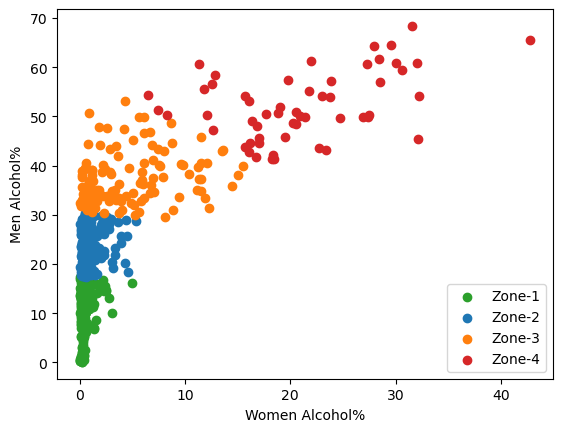

In [116]:

# Assuming 'Cluster' is a column in your DataFrame `alcohol` that contains cluster labels
plt.scatter(alcohol[alcohol['Cluster'] == 2].iloc[:, 0], alcohol[alcohol['Cluster'] == 2].iloc[:, 1], color= colors[0], label='Zone-1')

plt.scatter(alcohol[alcohol['Cluster'] == 0].iloc[:, 0], alcohol[alcohol['Cluster'] == 0].iloc[:, 1], color = colors[2], label='Zone-2')


plt.scatter(alcohol[alcohol['Cluster'] == 1].iloc[:, 0], alcohol[alcohol['Cluster'] == 1].iloc[:, 1], color=colors[1], label='Zone-3')



plt.scatter(alcohol[alcohol['Cluster'] == 3].iloc[:, 0], alcohol[alcohol['Cluster'] == 3].iloc[:, 1], color= colors[3], label='Zone-4')








plt.xlabel('Women Alcohol%')  # Replace with your actual feature names
plt.ylabel('Men Alcohol%')
plt.legend()
plt.show()


# By Child Malnourishment:
In this study, we will try to spot the regions in India where Child Malnourishment is a major problem by clustering them.

Following features will be incorporated: 

1. Total children age 6-23 months receiving an adequate diet16, 17  (%)
2. Children under 5 years who are stunted (height-for-age)18 (%)
3. Children under 5 years who are wasted (weight-for-height)18 (%)
4. Children under 5 years who are severely wasted (weight-for-height)19 (%)
5. Children under 5 years who are underweight (weight-for-age)18 (%)
6. Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)

In [117]:
child_df = pd.read_csv("C:\\Users\\mehul\\MyLab\\NHFS Research\\Data\\childdf.csv")
mal_data = pd.concat([child_df.iloc[:,0:5], child_df.iloc[:,6]], axis = 1)

In [118]:
mal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 6 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Total children age 6-23 months receiving an adequate diet16, 17  (%)      706 non-null    float64
 1   Children under 5 years who are stunted (height-for-age)18 (%)             707 non-null    float64
 2   Children under 5 years who are wasted (weight-for-height)18 (%)           707 non-null    float64
 3   Children under 5 years who are severely wasted (weight-for-height)19 (%)  707 non-null    float64
 4   Children under 5 years who are underweight (weight-for-age)18 (%)         707 non-null    float64
 5   Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)               707 non-null    float64
dtypes: float64(6)
memory usage: 33.3 KB


In [119]:
mal_data.head()

,"Total children age 6-23 months receiving an adequate diet16, 17 (%)",Children under 5 years who are stunted (height-for-age)18 (%),Children under 5 years who are wasted (weight-for-height)18 (%),Children under 5 years who are severely wasted (weight-for-height)19 (%),Children under 5 years who are underweight (weight-for-age)18 (%),Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)
0,18.7,21.6,15.7,24.6,24.6,37.7
1,5.9,27.0,27.0,42.8,42.8,30.4
2,23.5,21.1,12.6,17.4,17.4,43.4
3,16.1,19.7,19.5,21.4,21.4,59.6
4,1.8,36.4,19.2,32.2,32.2,66.7


In [120]:
mal_data.describe()

,"Total children age 6-23 months receiving an adequate diet16, 17 (%)",Children under 5 years who are stunted (height-for-age)18 (%),Children under 5 years who are wasted (weight-for-height)18 (%),Children under 5 years who are severely wasted (weight-for-height)19 (%),Children under 5 years who are underweight (weight-for-age)18 (%),Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)
count,706.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,12.333853,33.506506,18.559264,29.524894,29.524894,65.821782
std,7.485091,8.460084,6.498809,9.707463,9.707463,12.076166
min,0.000000,13.200000,4.500000,7.200000,7.200000,24.900000
25%,6.700000,27.300000,13.900000,22.100000,22.100000,59.500000
50%,10.900000,32.800000,18.100000,29.400000,29.400000,67.700000
75%,16.800000,39.200000,22.800000,36.250000,36.250000,74.000000
max,50.100000,60.600000,48.000000,62.400000,62.400000,95.500000


It can be inferred from a very high mean that Child Anemia (65.8) and Stuntedness(33.5) are most frequent.

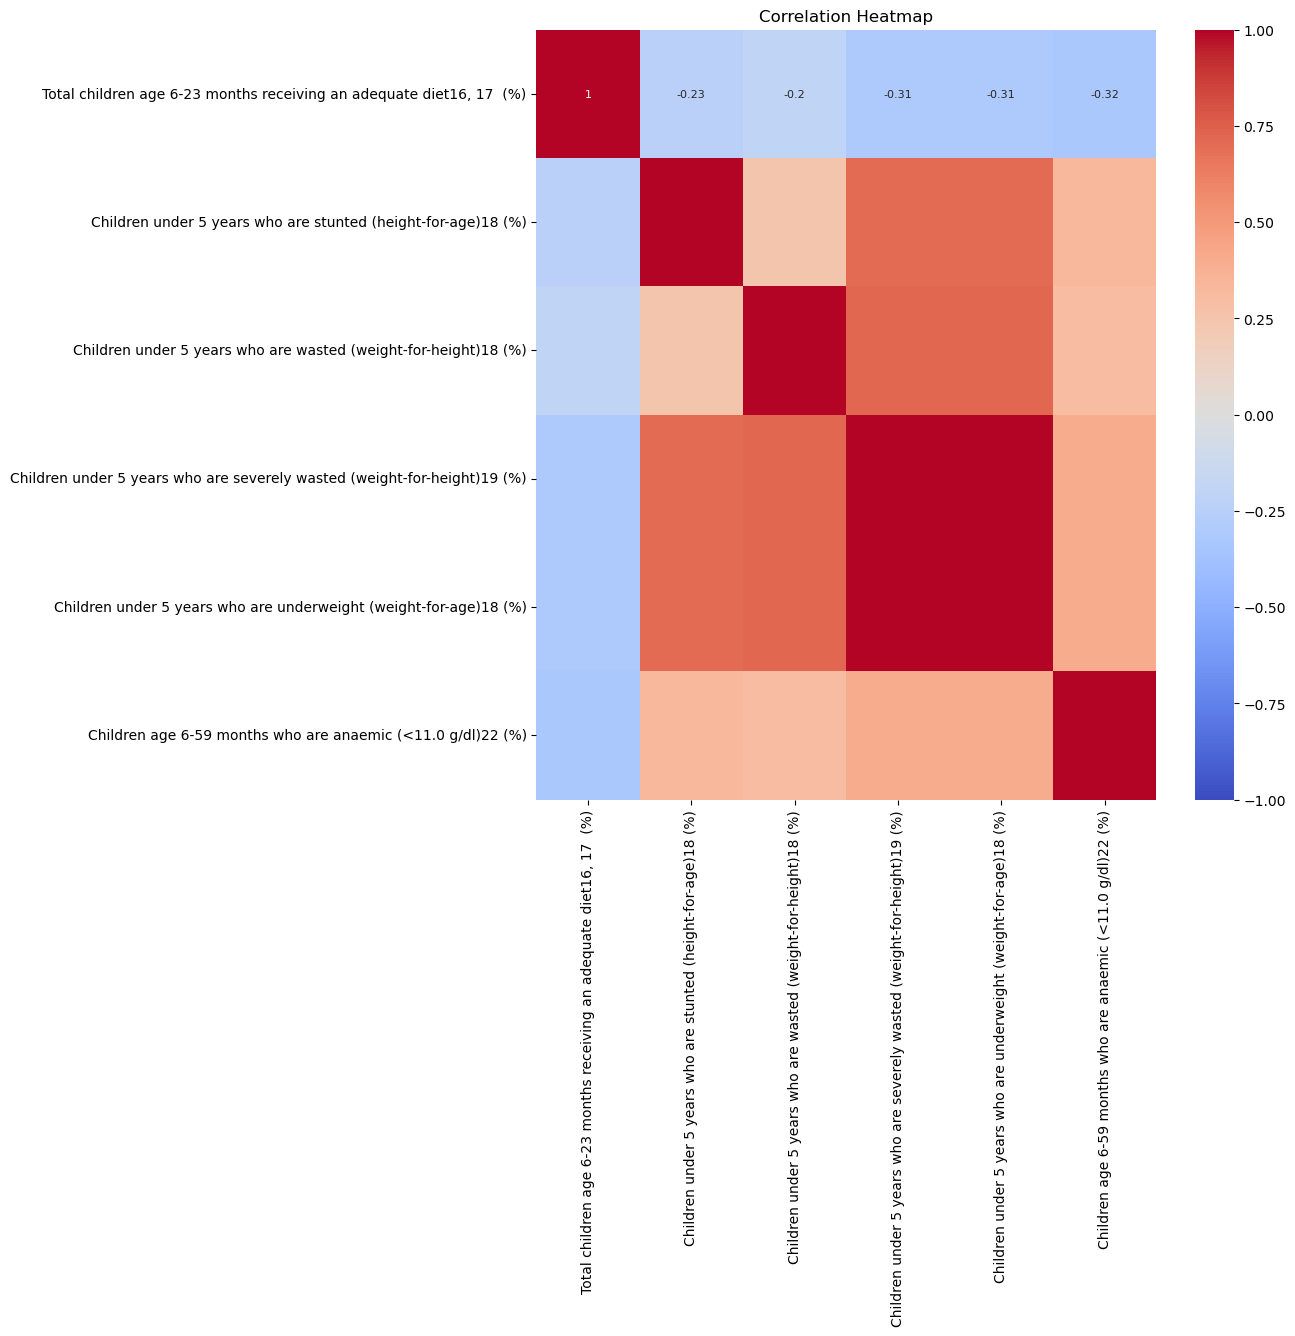

In [121]:
corr_matrix = mal_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', vmin=-1, vmax=1,xticklabels = True, yticklabels = True,annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

In [122]:
corr_matrix

,"Total children age 6-23 months receiving an adequate diet16, 17 (%)",Children under 5 years who are stunted (height-for-age)18 (%),Children under 5 years who are wasted (weight-for-height)18 (%),Children under 5 years who are severely wasted (weight-for-height)19 (%),Children under 5 years who are underweight (weight-for-age)18 (%),Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)
"Total children age 6-23 months receiving an adequate diet16, 17 (%)",1.000000,-0.234608,-0.197064,-0.310338,-0.310338,-0.320343
Children under 5 years who are stunted (height-for-age)18 (%),-0.234608,1.000000,0.242777,0.704010,0.704010,0.334807
Children under 5 years who are wasted (weight-for-height)18 (%),-0.197064,0.242777,1.000000,0.718973,0.718973,0.305550
Children under 5 years who are severely wasted (weight-for-height)19 (%),-0.310338,0.704010,0.718973,1.000000,1.000000,0.404419
Children under 5 years who are underweight (weight-for-age)18 (%),-0.310338,0.704010,0.718973,1.000000,1.000000,0.404419
Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%),-0.320343,0.334807,0.305550,0.404419,0.404419,1.000000


In [123]:
X.describe()

,Women Alcohol_%,Men Alcohol_%
count,707.000000,707.000000
mean,2.919943,23.194767
std,6.079831,13.363666
min,0.000000,0.100000
25%,0.300000,13.600000
50%,0.500000,20.200000
75%,1.700000,30.900000
max,42.800000,68.400000


In [124]:
mal_data = mal_data.dropna()

c:\Users\mehul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
c:\Users\mehul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


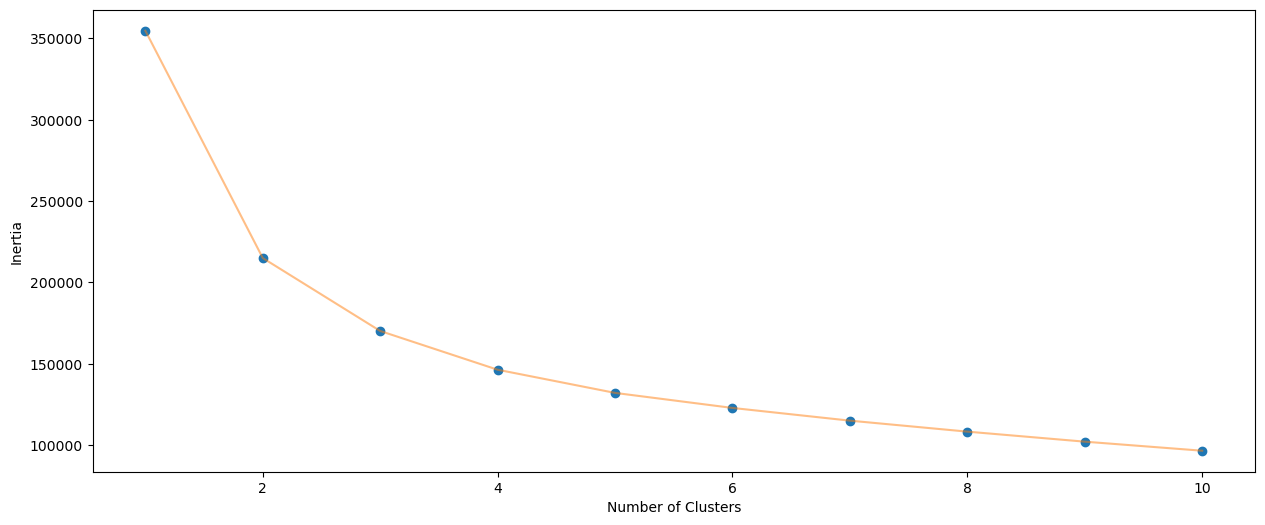

In [125]:


inertia = []  # WESS
for n in range(1 , 11):  # Number of CLusters to be tried
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(mal_data)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(mal_data)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

lenght = len(labels1)
mal_data['Cluster'] = labels1

In [126]:
mal_data.head()

,"Total children age 6-23 months receiving an adequate diet16, 17 (%)",Children under 5 years who are stunted (height-for-age)18 (%),Children under 5 years who are wasted (weight-for-height)18 (%),Children under 5 years who are severely wasted (weight-for-height)19 (%),Children under 5 years who are underweight (weight-for-age)18 (%),Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%),Cluster
0,18.7,21.6,15.7,24.6,24.6,37.7,1
1,5.9,27.0,27.0,42.8,42.8,30.4,5
2,23.5,21.1,12.6,17.4,17.4,43.4,1
3,16.1,19.7,19.5,21.4,21.4,59.6,3
4,1.8,36.4,19.2,32.2,32.2,66.7,2


In [127]:
mal_data['District'] = df['District Names']
mal_data['State/UT'] = df['State/UT']

In [128]:
cluster = mal_data[['District','State/UT','Cluster']]

cluster['Cluster'] = cluster['Cluster'].astype(int)
test = cluster[['District','State/UT','Cluster']]

C:\Users\mehul\AppData\Local\Temp\ipykernel_984\3110740173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['Cluster'] = cluster['Cluster'].astype(int)


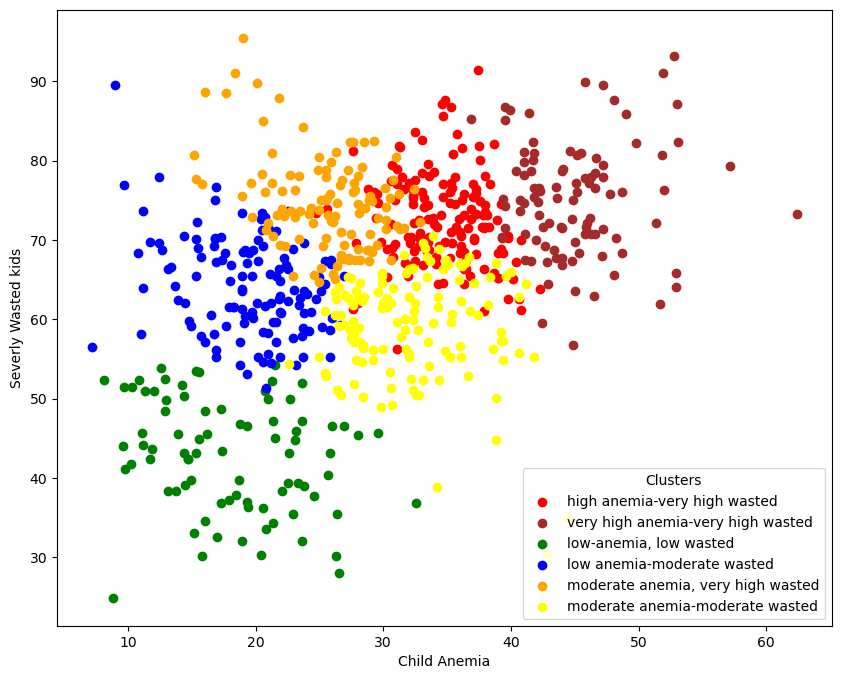

In [129]:

# Assuming 'Cluster' is a column in your DataFrame `alcohol` that contains cluster labels


plt.figure(figsize = (10,8))

colors = ['green', 'blue','yellow', 'orange', 'red', 'brown']  # Customize your colors here


plt.scatter(mal_data[mal_data['Cluster'] == 2].iloc[:, 3], mal_data[mal_data['Cluster'] ==2 ].iloc[:, 5], color= colors[4], label='high anemia-very high wasted')

plt.scatter(mal_data[mal_data['Cluster'] == 0].iloc[:, 3], mal_data[mal_data['Cluster'] == 0].iloc[:, 5], color = colors[5], label='very high anemia-very high wasted')


plt.scatter(mal_data[mal_data['Cluster'] == 1].iloc[:, 3], mal_data[mal_data['Cluster'] == 1].iloc[:, 5], color=colors[0], label='low-anemia, low wasted')



plt.scatter(mal_data[mal_data['Cluster'] == 3].iloc[:, 3], mal_data[mal_data['Cluster'] == 3].iloc[:, 5], color= colors[1], label='low anemia-moderate wasted')

plt.scatter(mal_data[mal_data['Cluster'] == 4].iloc[:, 3], mal_data[mal_data['Cluster'] == 4].iloc[:, 5], color= colors[3], label='moderate anemia, very high wasted')

plt.scatter(mal_data[mal_data['Cluster'] == 5].iloc[:, 3], mal_data[mal_data['Cluster'] == 5].iloc[:, 5], color= colors[2], label='moderate anemia-moderate wasted')



plt.xlabel("Child Anemia")
plt.ylabel("Severly Wasted kids")

plt.legend(loc='lower right', ncol=1,title="Clusters")
plt.show()


In [130]:
test

,District,State/UT,Cluster
0,Nicobars,Andaman & Nicobar Islands,1
1,North & Middle Andaman,Andaman & Nicobar Islands,5
2,South Andaman,Andaman & Nicobar Islands,1
3,Srikakulam,Andhra Pradesh,3
4,Vizianagaram,Andhra Pradesh,2
...,...,...,...
702,South Twenty Four Pargana,West Bengal,2
703,Paschim Medinipur,West Bengal,5
704,Purba Medinipur,West Bengal,4
705,Paschim Barddhaman,West Bengal,0


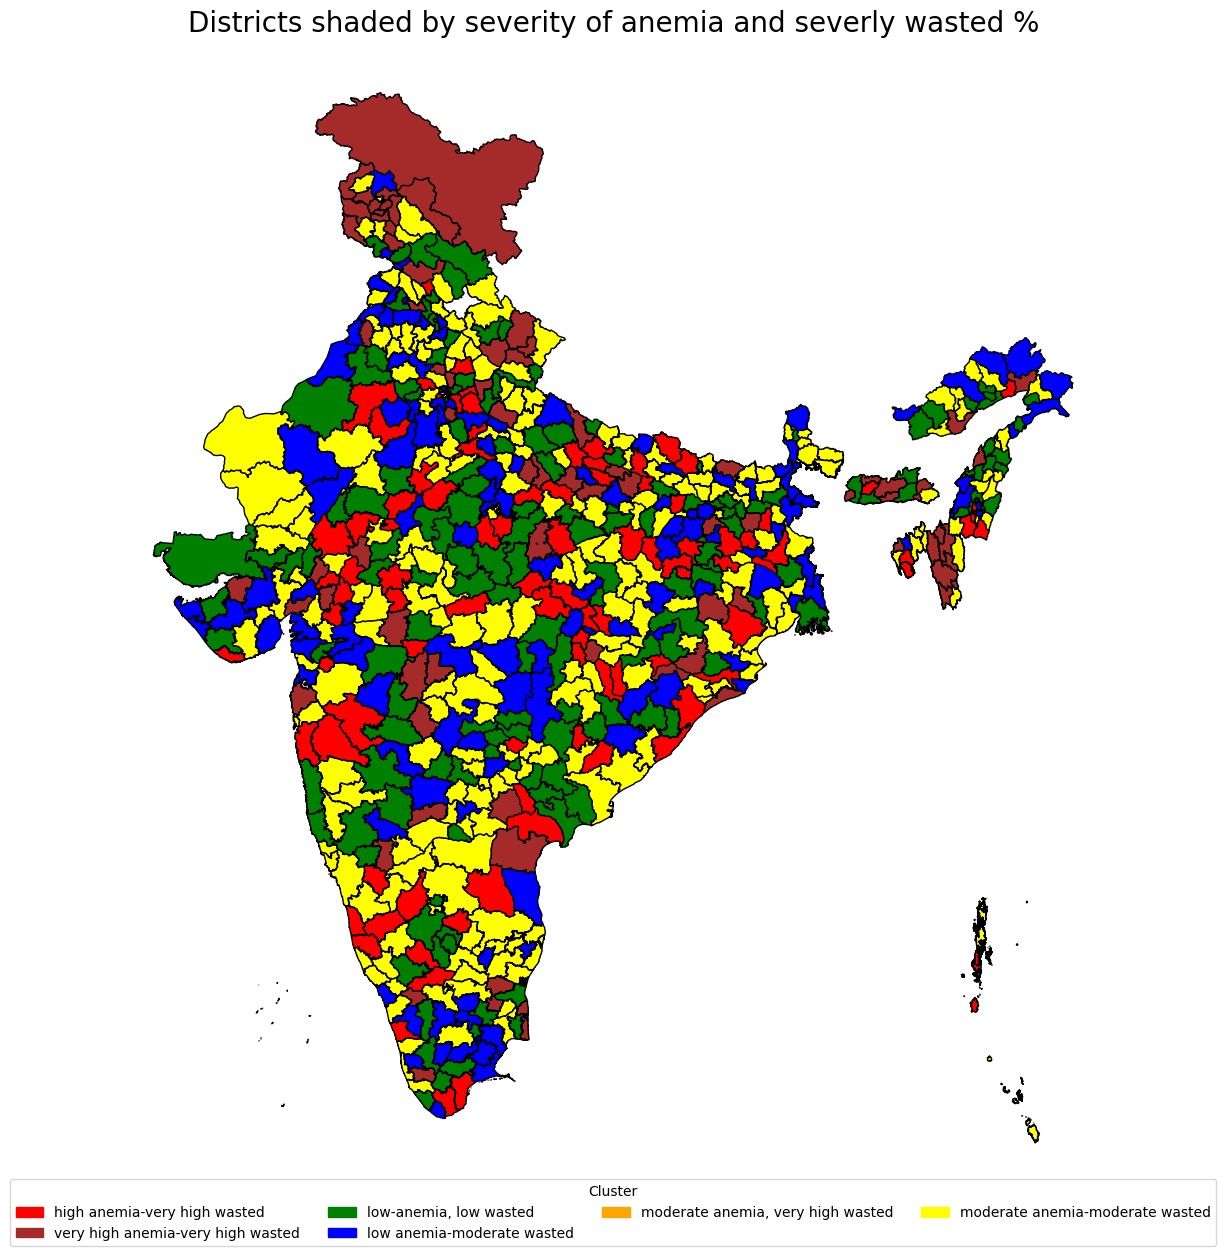

In [131]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Load the India shapefile
shapefile_path = "C:\\Users\\mehul\\MyLab\\NHFS Research\\Data\\shapefile\\DISTRICT_BOUNDARY.shp"
india_shapefile = gpd.read_file(shapefile_path)

# Remove leading/trailing spaces and normalize case
test['District'] = test['District'].str.strip().str.upper()
india_shapefile['DISTRICT_L'] = india_shapefile['DISTRICT_L'].str.strip().str.upper()

# Merge the DataFrame with the shapefile GeoDataFrame
geo_cluster = india_shapefile.merge(test, how='left', left_on='DISTRICT_L', right_on='District')

# Assign the values from 'test' to the 'geo_cluster' GeoDataFrame
geo_cluster['State/UT'] = test['State/UT']
geo_cluster['District_y'] = test['District']
geo_cluster['Cluster'] = test['Cluster']

# Define a colormap with specific colors for each cluster
colors = ['red', 'brown', 'green', 'blue', 'orange', 'yellow']  # Customize your colors here
cmap = mcolors.ListedColormap(colors)

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Normalize the colormap
norm = mcolors.BoundaryNorm(boundaries=[0, 1, 2, 3, 4, 5], ncolors=6)

# Plot the clusters with borders
geo_cluster.plot(column='Cluster', ax=ax,
                 legend=False,
                 cmap=cmap, norm=norm,
                 edgecolor='black')  # Add borders with 'edgecolor'

# Create custom legend
cluster_labels = ['high anemia-very high wasted', 'very high anemia-very high wasted', 'low-anemia, low wasted', 'low anemia-moderate wasted', 'moderate anemia, very high wasted', 'moderate anemia-moderate wasted']
patches = [mpatches.Patch(color=colors[i], label=cluster_labels[i]) for i in range(len(cluster_labels))]

# Add the legend to the plot
ax.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4, title="Cluster")

# Set the title
ax.set_title('Districts shaded by severity of anemia and severly wasted %', fontsize=20)

# Remove axes
ax.set_axis_off()

plt.show()


#